In [1]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

### Kwantowa transformata Fouriera - wprowadzenie

Kwantowa transformata Fouriera (QFT) jest kwantową implementacją dyskretnej transformaty Fouriera. Jest ona istotną częścią wielu algorytmów kwantowych, w szczególności algorytmu faktoryzacji Shora i kwantowej estymacji fazy. 
Dyskretna transformata Fouriera działa na wektor $(x_0, ..., x_{N-1})$ i przeprowadza go w wektor  $(y_0, ..., y_{N-1})$ zgodnie z wzorem:
$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$

gdzie $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$.

Podobnie, kwantowa transformata Fouriera działa na stan kwantowy $\vert X\rangle = \sum_{j=0}^{N-1} x_j \vert j \rangle$ i przeprowadza go w stan kwantowy $\vert Y\rangle = \sum_{k=0}^{N-1} y_k \vert k \rangle$ zgodnie z wzorem:

$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$

gdzie ponownie $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$. 

Można to zapisać także jako przekształcenie działające na stany bazowe:  

$$\vert j \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\omega_N^{jk} \vert k \rangle$$

Albo macierz unitarną:  

$$ U_{QFT} = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} \sum_{k=0}^{N-1} \omega_N^{jk} \vert k \rangle \langle j \vert$$

#### Kwantowa transformata Fouriera w jednym wymiarze (jeden kubit)

**Zadanie.** Obliczyć wynik działania operatora QFT na stan  $\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$. Czy znasz bramkę kwantową, która wykonuje właśnie taką transformację?  

#### Baza standardowa vs baza Fouriera

Można patrzeć na kwantową transformatę Fouriera jak na przekształcenie przeprowadzające stany z bazy obliczeniowej do bazy Fouriera.  

W jednym wymiarze - QFT jest realizowane przez bramkę Hadamarda, która transformuje stany bazowe bazy obliczeniowej ( $|0\rangle$, $|1\rangle$) w stany bazowe bazy diagonalnej ($|{+}\rangle$, $|{-}\rangle$). Podobnie, stany wielokubitowe mają odpowiadające im stany w bazie Fouriera. QFT jest przekształceniem, które wykonuje transformację między tymi bazami.  

$$
|\text{stan w bazie obliczeniowej}\rangle \quad \xrightarrow[]{\text{QFT}} \quad |\text{stan w bazie Fouriera}\rangle
$$

$$
\text{QFT}|x\rangle = |\widetilde{x}\rangle
$$


#### Implementacja QFT dla trzech kubitów


**Bramka controlled phase CP**

$$
CP(\theta) =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\theta}\end{bmatrix}
$$

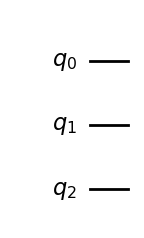

In [4]:
# Stworzenie obwodu

qc = QuantumCircuit(3)

# -----
# tu uzupełnić bramki
# -----

qc.draw(output="mpl")

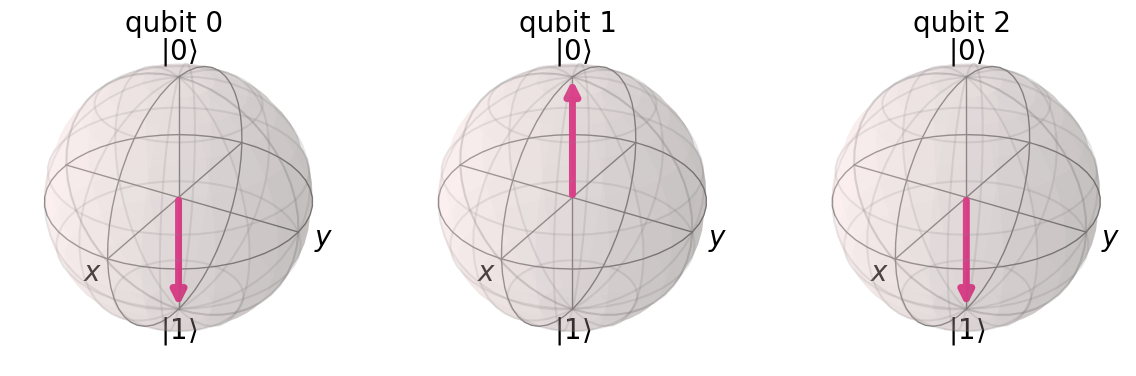

In [13]:
# Narysowanie stanu kodującego liczbę 5 na trzech kubitach + plot multivector
qc = QuantumCircuit(3)
qc.x(0)
qc.x(2)
statevector = Statevector.from_instruction(qc)
plot_bloch_multivector(statevector)

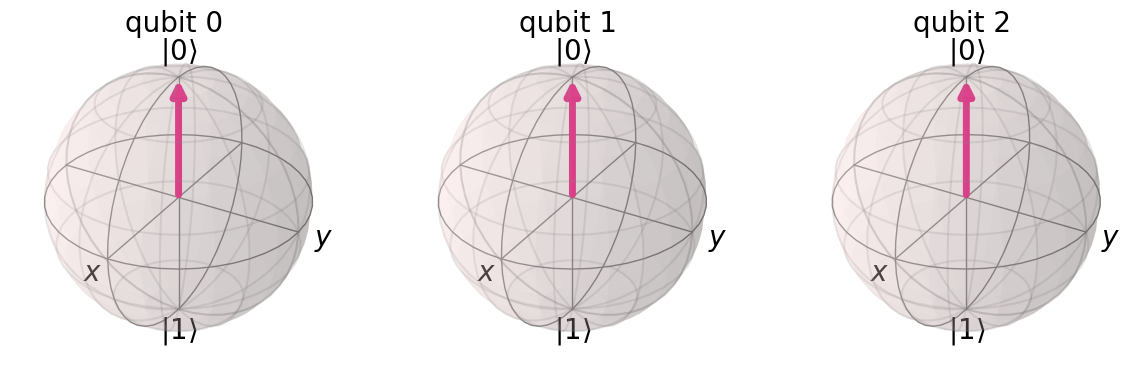

In [5]:
# Zadziałanie transformatą Fouriera + plot multivector

# Skopiować uzupełnione bramki z komórki 2 wyzej.

statevector = Statevector.from_instruction(qc)
plot_bloch_multivector(statevector)

#### Kwantowa transformata Fouriera dla wielu kubitów  
**Zadanie.** Napisać funkcję, która wygeneruje obwód kwantowy liczący kwantową transformatę Fouriera dla $n$ kubitów, gdzie $n$ to dowolna liczba naturalna.  

In [ ]:
def qft(circuit, n):
    
    
    return circuit

In [ ]:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw()

**Zadanie.** Zwizualizować przy pomocy `plot_bloch_multivector` jak wygląda stan reprezentujący liczbę naturalną 11 (na 4 kubitach) przed i po zadziałaniu QFT.  

#### Odwrotna transformata Fouriera

In [ ]:
def inverse_qft(circuit, n):
    
    qft_circ = qft(QuantumCircuit(n), n)
    
    inverse_qft_circ = qft_circ.inverse()
    
    circuit.append(inverse_qft_circ, circuit.qubits[:n])
    
    return circuit.decompose() 
    # .decompose() allows us to see the individual gates

**Zadanie.** Sprawdzić, że po zadziałaniu na stan kwantową transformatą Fouriera, a następnie odwrotną transformatą Fouriera, dostaniemy z powrotem początkowy stan.

**Zadanie.** Przykładowa implementacja na trzech kubitach była testowana przez sprawdzenie stanu $|\widetilde{5}\rangle$, dla którego $\text{QFT}^{\dagger}|\widetilde{5}\rangle = |101\rangle$. Znaleźć stan $|a\rangle$ taki że $\text{QFT}^{\dagger}|a\rangle = |100\rangle$. Znaleźć stan $|b\rangle$, taki że $\text{QFT}^{\dagger}|b\rangle = |011\rangle$.